In [37]:
# Install pyspark
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [39]:
# Importing a Spark function from library
from pyspark.sql.functions import col

In [40]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import*

from pyspark.sql.types import*

In [41]:
import pandas as pd
import numpy as np

In [43]:
spark = SparkSession.builder.appName("COVID-19 DATA ANALYSIS AND FUTURE PREDICTION").getOrCreate()

In [44]:
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [45]:
covid_df = spark.read.csv("covid/covid_19_data.csv", header=True, inferSchema=True)

In [46]:
covid_df

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [12]:
covid_df.count()

285307

In [13]:
covid_df.printSchema()

root
 |-- SNo: integer (nullable = true)
 |-- ObservationDate: string (nullable = true)
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Last Update: string (nullable = true)
 |-- Confirmed: double (nullable = true)
 |-- Deaths: double (nullable = true)
 |-- Recovered: double (nullable = true)



In [14]:
covid_df.select([count(when(isnull(column), column)).alias(column) for column in covid_df.columns])

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,0,72989,0,0,0,0,0


In [15]:
covid_df = covid_df.na.fill(value=0)
covid_df.select('Province/State').show(3,False)

+--------------+
|Province/State|
+--------------+
|Anhui         |
|Beijing       |
|Chongqing     |
+--------------+
only showing top 3 rows



In [16]:
covid_df.fillna("Province/State")

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [17]:
print(type(covid_df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [18]:
maxconfirmedcount = covid_df.groupBy("Country/Region").max("Confirmed")
maxconfirmedcount = maxconfirmedcount.orderBy('max(Confirmed)', ascending=False)
maxconfirmedcount.show(10,False) 

+--------------+--------------+
|Country/Region|max(Confirmed)|
+--------------+--------------+
|France        |5605532.0     |
|Turkey        |4875388.0     |
|India         |4665754.0     |
|UK            |3861901.0     |
|US            |3744830.0     |
|Argentina     |3005259.0     |
|Brazil        |2923367.0     |
|Poland        |2803233.0     |
|Iran          |2534855.0     |
|Indonesia     |1677274.0     |
+--------------+--------------+
only showing top 10 rows



In [19]:
maxdeathscount = covid_df.groupBy("Country/Region").max("Deaths")
maxdeathscount = maxdeathscount.orderBy('max(Deaths)', ascending=False)
maxdeathscount.show(10,False) 

+--------------+-----------+
|Country/Region|max(Deaths)|
+--------------+-----------+
|UK            |112182.0   |
|France        |104093.0   |
|Brazil        |97058.0    |
|Iran          |72484.0    |
|India         |69615.0    |
|Poland        |68068.0    |
|Argentina     |64252.0    |
|US            |62078.0    |
|South Africa  |54417.0    |
|Indonesia     |45796.0    |
+--------------+-----------+
only showing top 10 rows



In [20]:
maxrecoveredcount = covid_df.groupBy("Country/Region").max("Recovered")
maxrecoveredcount = maxrecoveredcount.orderBy('max(Recovered)', ascending=False)
maxrecoveredcount.show(10,False)

+--------------+--------------+
|Country/Region|max(Recovered)|
+--------------+--------------+
|US            |6399531.0     |
|Turkey        |4480381.0     |
|India         |3930302.0     |
|Argentina     |2676197.0     |
|Brazil        |2588973.0     |
|Poland        |2520968.0     |
|Iran          |1988165.0     |
|Mexico        |1869529.0     |
|Peru          |1748170.0     |
|Czech Republic|1555215.0     |
+--------------+--------------+
only showing top 10 rows



In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



In [22]:
df=pd.read_csv('covid/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [23]:
df=df[['Province/State','Country/Region','Confirmed','Deaths','Recovered']]

In [24]:
df.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.885990,0.591882
Deaths,0.885990,1.000000,0.509682
Recovered,0.591882,0.509682,1.000000


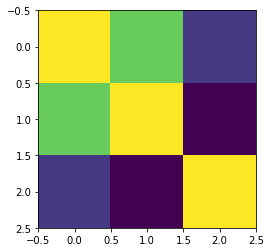

In [25]:
plt.imshow(df.corr())

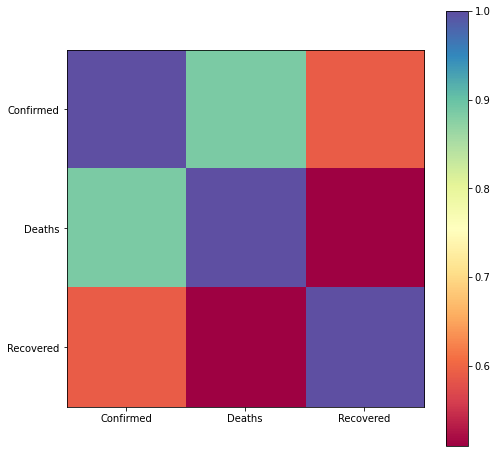

In [27]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar()
plt.gcf().set_size_inches(8, 8)
plt.xticks(range(len(df.corr().columns)), df.corr().columns)
plt.yticks(range(len(df.corr().columns)), df.corr().columns)
plt.show()